In [6]:
# Assessment #1: Perform data quality check by checking for missing values if any
# This script does the following:
# Loads the dataset into a pandas DataFrame.
# Prints basic information about the dataset using df.info().
# Checks for missing values in each column using df.isnull().sum().
# Prints the count of missing values for each column.
# Checks if there are any missing values in the entire dataset.
# Visualizes missing values using a heatmap.

import pandas as pd

# Load the 1688640705_hr_comma_sep.xlsx dataset into a pandas DataFrame
df = pd.read_excel('1688640705_hr_comma_sep.xlsx')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("\nMissing Values:")
print(missing_values)

# Check if there are any missing values in the entire dataset
if missing_values.sum() == 0:
    print("\nNo missing values found in the dataset.")
else:
    print("\nThere are missing values in the dataset.")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None

Missing Values:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left   

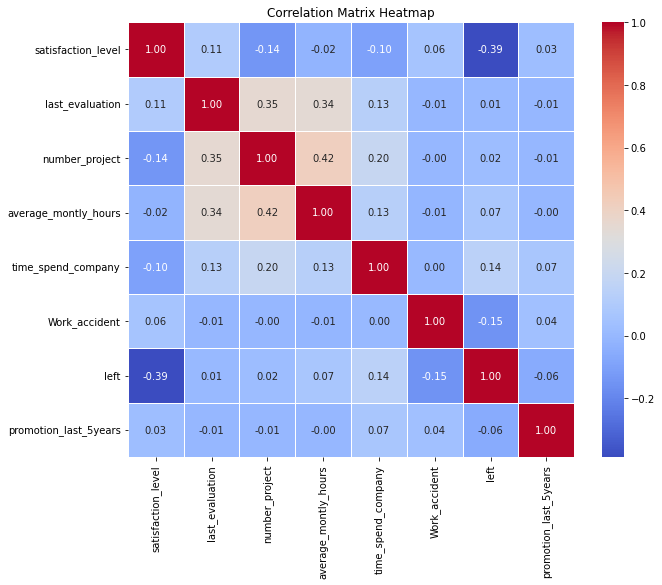

In [7]:
# Assessment # 2: Understand what factors contributed most to employee turnover by EDA
# 2.1.	Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.
# To draw a heatmap of the correlation matrix between numerical features in Python, we can use the seaborn library along with matplotlib for visualization. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('1688640705_hr_comma_sep.xlsx')

# Extract numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

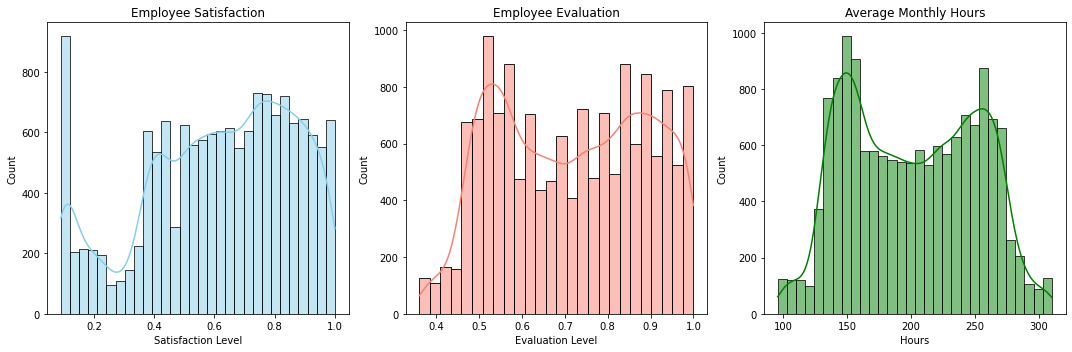

In [8]:
# 2.2.	Draw the distribution plot of 
# ■	Employee Satisfaction (use column satisfaction_level)
# ■	Employee Evaluation (use column last_evaluation)
# ■	Employee Average Monthly Hours (use column average_montly_hours)

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot distribution of Employee Satisfaction
sns.histplot(df['satisfaction_level'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Employee Satisfaction')
axes[0].set_xlabel('Satisfaction Level')

# Plot distribution of Employee Evaluation
sns.histplot(df['last_evaluation'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Employee Evaluation')
axes[1].set_xlabel('Evaluation Level')

# Plot distribution of Average Monthly Hours
sns.histplot(df['average_montly_hours'], kde=True, ax=axes[2], color='green')
axes[2].set_title('Average Monthly Hours')
axes[2].set_xlabel('Hours')

# Adjust layout
plt.tight_layout()
plt.show()

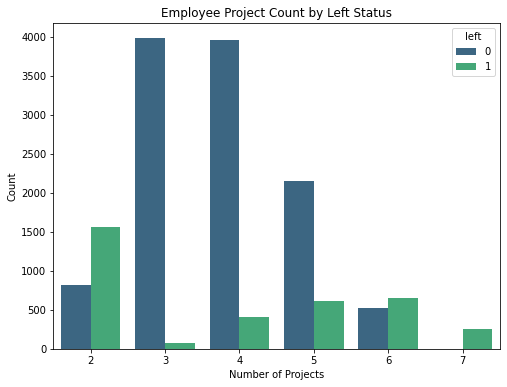

In [10]:
# 2.3.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.

# Set up the figure
plt.figure(figsize=(8, 6))

# Plot bar plot of Employee Project Count with hue based on 'left'
sns.countplot(x='number_project', hue='left', data=df, palette='viridis')

# Set plot labels and title
plt.title('Employee Project Count by Left Status')
plt.xlabel('Number of Projects')
plt.ylabel('Count')

# Show the plot. sns.countplot is used to create a bar plot, with the x-axis representing the number of projects (number_project) and differentiating between employees who left (left=1) and those who stayed (left=0).
plt.show()

# Inference: 
# The bar plot shows the distribution of the number of projects for employees who left and employees who stayed. From the bar plot its apparent that employees who are involved in 3 to 5 projects are likely stay with the company while the employees who are involved in less than 3 or more than 5 projects are likely to leave the company.

       satisfaction_level  last_evaluation  cluster
0                    0.38             0.53        0
1                    0.80             0.86        1
2                    0.11             0.88        2
3                    0.72             0.87        1
4                    0.37             0.52        0
...                   ...              ...      ...
14994                0.40             0.57        0
14995                0.37             0.48        0
14996                0.37             0.53        0
14997                0.11             0.96        2
14998                0.37             0.52        0

[3571 rows x 3 columns]


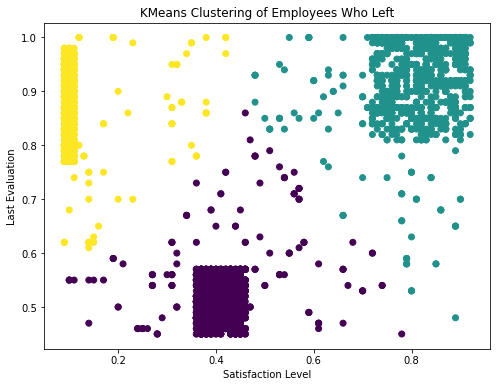

In [1]:
# Assessment # 3: Perform clustering of Employees who left based on their satisfaction and evaluation.
# 3.1.	Choose columns satisfaction_level, last_evaluation and left.
# 3.2.	Do KMeans clustering of employees who left the company into 3 clusters.

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel('1688640705_hr_comma_sep.xlsx')

# Select relevant columns for clustering
columns_for_clustering = ['satisfaction_level', 'last_evaluation']

# Filter rows for employees who left and create a copy to avoid SettingWithCopyWarning
left_employees_df = df[df['left'] == 1].copy()

# Extract features for clustering
X = left_employees_df[columns_for_clustering]

# Perform KMeans clustering with 3 clusters, explicitly setting n_init
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
left_employees_df['cluster'] = kmeans.fit_predict(X)

# Display the resulting clusters
print(left_employees_df[['satisfaction_level', 'last_evaluation', 'cluster']])

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(left_employees_df['satisfaction_level'], left_employees_df['last_evaluation'], c=left_employees_df['cluster'], cmap='viridis')
plt.title('KMeans Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

# 3.3.Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.
# Inference: From the scatter plot it can be inferred that the employees who received higher rating between 0.8 to 1.0, have shown greater employee satisfaction (0.8)

In [15]:
# Assessment # 4: Handle the left Class Imbalance using SMOTE technique
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
df = pd.read_excel('1688640705_hr_comma_sep.xlsx')

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Separate categorical and numerical variables
categorical_cols = ['sales', 'salary']  # Add other categorical columns as needed
numeric_cols = [col for col in df.columns if col not in ['left'] + categorical_cols]

# Step 2: Apply get_dummies to categorical variables
df_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)

# Step 3: Combine categorical and numeric variables
df_processed = pd.concat([df[numeric_cols], df_categorical, df['left']], axis=1)

# Separate features and target variable
X = df_processed.drop('left', axis=1)
y = df_processed['left']

# Step 4.1: Stratified split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Step 4.2: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4.3: Upsample the training dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 4.4: Train a classifier (Random Forest, for example) on the resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# Step 4.5: Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Step 4.6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.99

Confusion Matrix:
[[2276   10]
 [  15  699]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



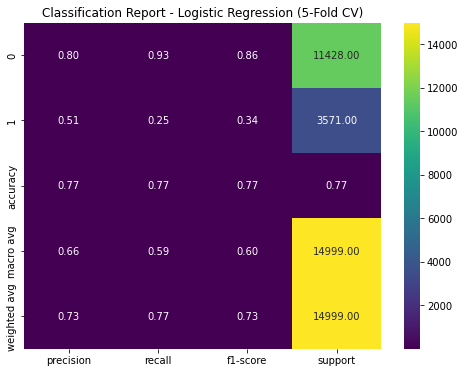

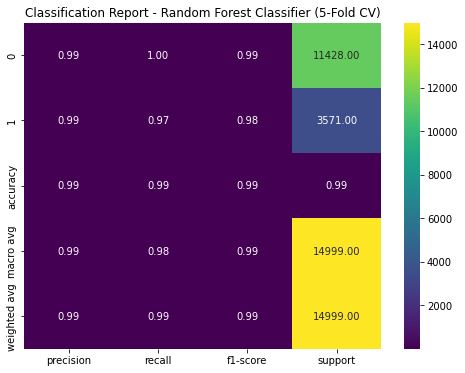

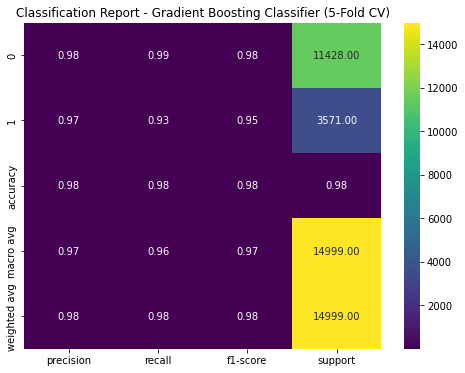

In [24]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_excel('1688640705_hr_comma_sep.xlsx')

# Features and target variable
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a Logistic Regression model with increased max_iter
model = LogisticRegression(random_state=42, max_iter=1000)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(model, X_scaled, y, cv=cv, method='predict_proba')

# Convert probabilities to class predictions (0 or 1)
y_pred_class = (y_pred_cv[:, 1] > 0.5).astype(int)

# Plot the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y, y_pred_class, output_dict=True)).T, annot=True, cmap='viridis', fmt=".2f")
plt.title('Classification Report - Logistic Regression (5-Fold CV)')
plt.show()

# 5.2.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.
# Features and target variable
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(model, X, y, cv=cv, method='predict_proba')

# Convert probabilities to class predictions (0 or 1)
y_pred_class = (y_pred_cv[:, 1] > 0.5).astype(int)

# Plot the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y, y_pred_class, output_dict=True)).T, annot=True, cmap='viridis', fmt=".2f")
plt.title('Classification Report - Random Forest Classifier (5-Fold CV)')
plt.show()

# 5.3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.

# Features and target variable
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier model
model = GradientBoostingClassifier(random_state=42)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(model, X, y, cv=cv, method='predict_proba')

# Convert probabilities to class predictions (0 or 1)
y_pred_class = (y_pred_cv[:, 1] > 0.5).astype(int)

# Plot the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y, y_pred_class, output_dict=True)).T, annot=True, cmap='viridis', fmt=".2f")
plt.title('Classification Report - Gradient Boosting Classifier (5-Fold CV)')
plt.show()

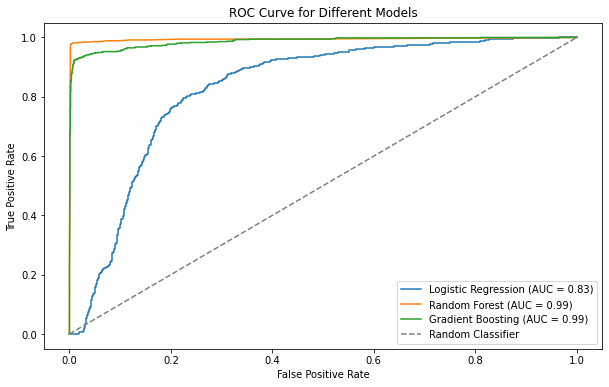

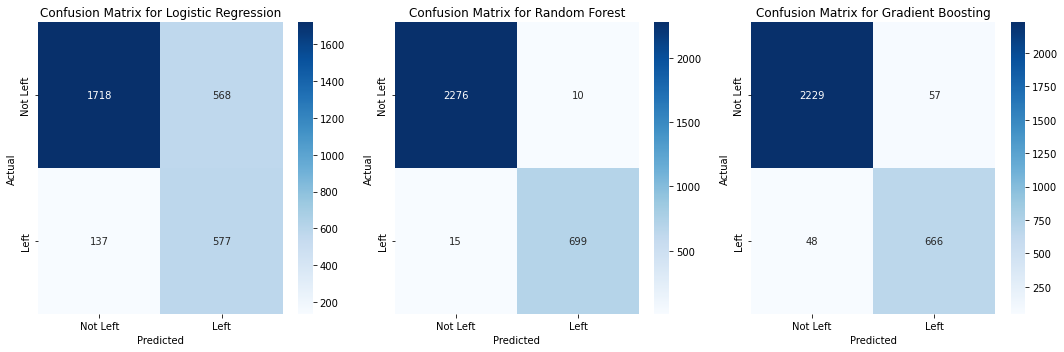

Precision: 0.59
Recall: 0.36
F1 Score: 0.45


In [3]:
# Assesssment # 6: Identify the best model and justify the evaluation metrics used.
# To compare the models and identify the best one, you can use the ROC/AUC (Receiver Operating Characteristic/Area Under the Curve) metric. This metric is commonly used for binary classification problems and provides an overall assessment of a model's performance across various classification thresholds. Here's how we can calculate ROC/AUC and plot the ROC curves for each model:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE

# Load your dataset
df = pd.read_excel('1688640705_hr_comma_sep.xlsx')

# Step 1: Separate categorical and numerical variables
categorical_cols = ['sales', 'salary']  # Add other categorical columns as needed
numeric_cols = [col for col in df.columns if col not in ['left'] + categorical_cols]

# Step 2: Apply get_dummies to categorical variables
df_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)

# Step 3: Combine categorical and numeric variables
df_processed = pd.concat([df[numeric_cols], df_categorical, df['left']], axis=1)

# Separate features and target variable
X = df_processed.drop('left', axis=1)
y = df_processed['left']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Upsample the training dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 7: Train models
lr_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

models = [lr_model, rf_model, gb_model]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Plot ROC curves
plt.figure(figsize=(10, 6))

for model, name in zip(models, model_names):
    model.fit(X_resampled, y_resampled)
    y_score = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the random classifier for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend()
plt.show()

# To find the confusion matrix for each of the models, we can use the confusion_matrix function from scikit-learn. In this code: (1) The confusion_matrix function is used to calculate the confusion matrix for each model. (2) The sns.heatmap function from the seaborn library is used to visualize the confusion matrices. The confusion matrix provides a detailed view of the model's performance, showing the number of true positives, true negatives, false positives, and false negatives. It's a useful tool for understanding the strengths and weaknesses of a classification model. Adjust the code according to your specific requirements and dataset characteristics.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix  # Add this import statement
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Step 1: Separate categorical and numerical variables
categorical_cols = ['sales', 'salary']  # Add other categorical columns as needed
numeric_cols = [col for col in df.columns if col not in ['left'] + categorical_cols]

# Step 2: Apply get_dummies to categorical variables
df_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)

# Step 3: Combine categorical and numeric variables
df_processed = pd.concat([df[numeric_cols], df_categorical, df['left']], axis=1)

# Separate features and target variable
X = df_processed.drop('left', axis=1)
y = df_processed['left']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Upsample the training dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 7: Train models
lr_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

models = [lr_model, rf_model, gb_model]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Calculate and plot confusion matrices
plt.figure(figsize=(15, 5))

for i, (model, name) in enumerate(zip(models, model_names), 1):
    plt.subplot(1, 3, i)
    
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test_scaled)
    
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Left', 'Left'], yticklabels=['Not Left', 'Left'])
    
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# 6.3.From the confusion matrix, explain which metric needs to be used- Recall or Precision?
# The choice between recall and precision depends on the specific goals and requirements of the application, as well as the consequences of false positives and false negatives in the problem domain. 
# When to Use Recall: Use recall when the cost of false negatives (missing a positive instance) is high. For example, in a medical diagnosis scenario, if failing to identify a disease is more critical than falsely diagnosing a healthy person, prioritize recall.
# When to Use Precision:  Use precision when the cost of false positives (predicting positive incorrectly) is high. For instance, in a spam email detection system, if marking a legitimate email as spam has severe consequences, prioritize precision.
# F1 Score: If there is a balance between the importance of recall and precision, we might consider using the F1 score, which is the harmonic mean of recall and precision. F1 Score combines both recall and precision into a single metric and is useful when there is an uneven class distribution.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Assuming you have features X and target variable y
X = df.drop('left', axis=1)
y = df['left']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['sales', 'salary'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=123, stratify=y)

# Train a logistic regression model (you can use any model)
model = LogisticRegression(random_state=42,max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print precision and recall values
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Let's consider F1 score too assuming that we give balanced importance to false positives and false negatives.
# Calculate F1 Score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Conclusion:
# In the context of the employee turnover use case, where the goal is to predict whether an employee will leave the company, the choice between precision and recall depends on the specific priorities and consequences of false positives and false negatives. Let's consider the metrics:

# Precision (Positive Predictive Value): 0.62
# Precision measures the accuracy of the model when it predicts an employee will leave. A precision of 0.63 indicates that out of all employees predicted to leave, approximately 63% actually do leave. This is relevant if the cost of false positives (incorrectly predicting an employee will leave when they don't) is high.

# Recall (Sensitivity or True Positive Rate): 0.40
# Recall measures the ability of the model to capture all employees who actually leave. A recall of 0.41 indicates that approximately 41% of employees who actually leave are correctly identified by the model. This is relevant if the cost of false negatives (missing an employee who actually leaves) is high.

# F1 Score: 0.49
# F1 Score is the harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives. A higher F1 Score indicates a better balance between precision and recall.

# Advice:

# If the cost of losing an employee is high:
# If the company incurs significant costs or challenges when an employee leaves, and minimizing false negatives (missing an employee who will leave) is a priority, we may want to prioritize recall. We want to identify as many employees at risk of leaving as possible.

# If the cost of false predictions is high:
# If there are substantial costs or negative consequences associated with incorrectly predicting that an employee will leave (false positives), we may want to prioritize precision. We want to ensure that when the model predicts an employee will leave, it is highly likely to happen.

# Consider the trade-off:
# Evaluate the business implications of false positives and false negatives. If both types of errors have significant consequences, We might consider a balance between precision and recall. 

#Ultimately, the decision should align with the business objectives and the specific consequences of making different types of errors in the context of employee turnover.

In [10]:
# Assessment # 7: 7.	Suggest various retention strategies for targeted employees.
# 7.1. Using the best model, predict the probability of employee turnover in the test data.
# To determine the best-performing model, you can consider various metrics such as accuracy, precision, recall, and F1 score. Here's a summary of results:

# Logistic Regression:
# True Negative (TN) = 1718
# False Negative (FN) = 137
# True Positive (TP) = 577
# False Positive (FP) = 568
# Random Forest:
# True Negative (TN) = 2276
# False Negative (FN) = 15
# True Positive (TP) = 699
# False Positive (FP) = 10
# Gradient Boosting:
# True Negative (TN) = 2229
# False Negative (FN) = 48
# True Positive (TP) = 666
# False Positive (FP) = 57
# Now, let's calculate and compare some common classification metrics: 
# Definitions based on the given results
# Definitions based on the given results
logistic_regression = {'TN': 1718, 'FN': 137, 'TP': 577, 'FP': 568}
random_forest = {'TN': 2276, 'FN': 15, 'TP': 699, 'FP': 10}
gradient_boosting = {'TN': 2229, 'FN': 48, 'TP': 666, 'FP': 57}

# Calculate metrics
def calculate_metrics(results):
    accuracy = (results['TP'] + results['TN']) / (results['TP'] + results['TN'] + results['FP'] + results['FN'])
    precision = results['TP'] / (results['TP'] + results['FP'])
    recall = results['TP'] / (results['TP'] + results['FN'])
    f1_score = 2 * precision * recall / (precision + recall)
    return accuracy, precision, recall, f1_score

# Calculate metrics for each model
lr_metrics = calculate_metrics(logistic_regression)
rf_metrics = calculate_metrics(random_forest)
gb_metrics = calculate_metrics(gradient_boosting)

# Format and print the results
print(f"{'Model':<20}{'Accuracy':<15}{'Precision':<15}{'Recall':<15}{'F1 Score':<15}")
print(f"{'Logistic Regression':<20}{lr_metrics[0]:<15.4f}{lr_metrics[1]:<15.4f}{lr_metrics[2]:<15.4f}{lr_metrics[3]:<15.4f}")
print(f"{'Random Forest':<20}{rf_metrics[0]:<15.4f}{rf_metrics[1]:<15.4f}{rf_metrics[2]:<15.4f}{rf_metrics[3]:<15.4f}")
print(f"{'Gradient Boosting':<20}{gb_metrics[0]:<15.4f}{gb_metrics[1]:<15.4f}{gb_metrics[2]:<15.4f}{gb_metrics[3]:<15.4f}")

# Overall Performance: for overall classification performance, accuracy is a useful metric. Random Forest has the highest accuracy (0.9917). Based on these considerations, Random Forest seems to perform exceptionally well across multiple metrics in this scenario. 
# Predict the probability of employee turnover in the test data (Using Random Forest).

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the 1688640705_hr_comma_sep.xlsx dataset into a pandas DataFrame
df = pd.read_excel('1688640705_hr_comma_sep.xlsx')

# Select features and target variable
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict the probability of employee turnover on the test data
probabilities = rf_model.predict_proba(X_test)[:, 1]

# Display the predicted probabilities
print("Predicted Probabilities of Employee Turnover:")
print(probabilities)

# 7.2.	Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
# (1) Safe Zone (Green) (Score < 20%)
# (2) Low Risk Zone (Yellow) (20% < Score < 60%)
# (3) Medium Risk Zone (Orange) (60% < Score < 90%)
# (4) High Risk Zone (Red) (Score > 90%).

# Select features and target variable
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict the probability of employee turnover on the test data
probabilities = rf_model.predict_proba(X_test)[:, 1]

# Define probability score ranges for each zone
safe_zone = 0.20  # 20%
low_risk_zone = 0.60  # 60%
medium_risk_zone = 0.90  # 90%

# Categorize employees into zones
employee_zones = []
for probability in probabilities:
    if probability < safe_zone:
        employee_zones.append("Safe Zone (Green)")
    elif safe_zone <= probability < low_risk_zone:
        employee_zones.append("Low Risk Zone (Yellow)")
    elif low_risk_zone <= probability < medium_risk_zone:
        employee_zones.append("Medium Risk Zone (Orange)")
    else:
        employee_zones.append("High Risk Zone (Red)")

# Add the 'employee_zones' information to the DataFrame
df_test = df.loc[X_test.index]  # Use the index of the test set
df_test['Employee Zone'] = employee_zones

# Display the DataFrame with Zone information
print("Employee Data with Zones:")
print(df_test[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left', 'Employee Zone']])

# Suggestions:
# Safe Zone (Green):
# Recognize and appreciate employees' contributions regularly.
# Provide opportunities for skill development and career growth.
# Foster a positive work environment with work-life balance initiatives.
# Encourage teamwork and collaboration among employees.

# Low Risk Zone (Yellow):
# Conduct regular check-ins to assess job satisfaction and address concerns.
# Offer additional training programs to enhance skills and productivity.
# Provide opportunities for employees to take on leadership roles in projects.
# Implement flexible work arrangements to accommodate personal needs.

# Medium Risk Zone (Orange):
# Conduct in-depth performance reviews and address any concerns proactively.
# Offer mentorship programs to provide guidance and support.
# Introduce employee engagement activities to boost morale.
# Implement targeted retention bonuses or incentives for key contributors.

# High Risk Zone (Red):
# Conduct exit interviews to understand reasons for dissatisfaction.
# Implement immediate interventions to address specific concerns.
# Consider tailored retention packages for critical employees.
# Develop a strategic plan for knowledge transfer in case of departure.

# These strategies are general recommendations and may need to be adjusted based on the specific needs and dynamics of the organization. Additionally, regular communication and feedback from employees in each zone can provide valuable insights for refining and adapting the retention strategies over time.


Model               Accuracy       Precision      Recall         F1 Score       
Logistic Regression 0.7650         0.5039         0.8081         0.6208         
Random Forest       0.9917         0.9859         0.9790         0.9824         
Gradient Boosting   0.9650         0.9212         0.9328         0.9269         
Predicted Probabilities of Employee Turnover:
[0.   0.04 0.   ... 0.01 0.06 0.86]
Employee Data with Zones:
       satisfaction_level  last_evaluation  number_project  \
6723                 0.65             0.96               5   
6473                 0.88             0.80               3   
4679                 0.69             0.98               3   
862                  0.41             0.47               2   
7286                 0.87             0.76               5   
...                   ...              ...             ...   
3297                 0.61             0.74               2   
14113                0.93             0.89               3   
5514      